In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools            # load data
from scipy import stats     # znorm func
import numpy as np
import networkx as nx
import seaborn as sns

In [178]:
class agent:
    def __init__(self) -> None:
        self.maze = maze()
        self.current_state = 0
        self.gamma = 0.8  # learning parameter
        self.R = self.generate_r_matrix(matrix_size=len(self.maze.points_list), goal=4) # TODO need a better definition about goal state
        self.Q = self.init_q_matrix(matrix_size=len(self.maze.points_list))
        
    def perform_actions(action):
        print('create new slots ...')

    def available_actions0(self, state, v=True):        
        av_act = [b for (a,b) in self.maze.edges_list if a==state]
        if v: 
            print("{} -> {}".format(self.maze.mappings[state], [self.maze.mappings[a] for a in av_act]))
        return av_act
    
    def available_actions(self, state):
        current_state_row = self.R[state,]
        av_act = np.where(current_state_row >= 0)[1]
        return av_act

    def sample_next_action(self, available_act):
        next_action = int(np.random.choice(available_act,1))
        return next_action
    
    def generate_r_matrix(self, matrix_size, goal):
        R = np.matrix(np.ones(shape=(matrix_size, matrix_size)))
        R *= -1
        # assign zeros to paths and 100 to goal-reaching point
        for edge in self.maze.edges_list:
            if edge[1] == goal:
                R[edge] = 100
            else:
                R[edge] = 0

            if edge[0] == goal:
                R[edge[::-1]] = 100
            else:
              # reverse of point
              R[edge[::-1]]= 0

        # add goal point round trip
        R[goal,goal]= 100

        return R
    
    def init_q_matrix(self,matrix_size):
        Q = np.matrix(np.zeros([matrix_size,matrix_size]))
        return Q
    
    
    def update(self, current_state, action, gamma):
        Q = self.Q
        R = self.R
        
        max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

        if max_index.shape[0] > 1:
            max_index = int(np.random.choice(max_index, size = 1))
        else:
            max_index = int(max_index)
        max_value = Q[action, max_index]

        Q[current_state, action] = R[current_state, action] + gamma * max_value
        #print('max_value', R[current_state, action] + gamma * max_value)
        
        self.Q = Q

        if (np.max(Q) > 0):
            return(np.sum(Q/np.max(Q)*100))
        else:
            return (0)
        
    def q_learning(self):
        # training
        scores = []
        for i in range(700):
            current_state = np.random.randint(0, int(self.Q.shape[0]))
            available_act = self.available_actions(current_state)
            action = self.sample_next_action(available_act)
            score = self.update(current_state,action,self.gamma)
            scores.append(score)
            #print ('Score:', str(score))
        print("Trained Q matrix:")
        print(self.Q/np.max(self.Q)*100)
        
        # testing
        current_state = 0
        steps = [current_state]

        while current_state != 4:
            next_step_index = np.where(self.Q[current_state,] == np.max(self.Q[current_state,]))[1]

            if next_step_index.shape[0] > 1:
                next_step_index = int(np.random.choice(next_step_index, size = 1))
            else:
                next_step_index = int(next_step_index)

            steps.append(next_step_index)
            current_state = next_step_index

        print("Most efficient path:")
        print(steps)

        plt.plot(scores)
        plt.show()

In [179]:
class maze:
    def __init__(self) -> None:

        self.points_list = self.generate_points()
        self.edges_list = self.generate_edges()
            
    def generate_points(self):
        VISUAL = 0
        GOAL = 1
        IMAGINAL = 2
        RETRIEVAL = 3
        MOTOR = 4
        self.mappings = {VISUAL:'VISUAL', GOAL:'GOAL', IMAGINAL:'IMAGINAL', RETRIEVAL:'RETRIEVAL', MOTOR:'MOTOR'}
        return [VISUAL, GOAL, IMAGINAL, RETRIEVAL, MOTOR]

    def generate_edges(self):
        VISUAL = 0
        GOAL = 1
        IMAGINAL = 2
        RETRIEVAL = 3
        MOTOR = 4
        edges = [(VISUAL,GOAL), (VISUAL,IMAGINAL), (GOAL,IMAGINAL), (IMAGINAL,GOAL), (GOAL, RETRIEVAL), (RETRIEVAL, GOAL), (IMAGINAL, RETRIEVAL), (RETRIEVAL, IMAGINAL), (RETRIEVAL, RETRIEVAL), (IMAGINAL, MOTOR)]
        edges.sort()
        return edges
    
    def draw_maze(self):
        G=nx.DiGraph()
        G.add_nodes_from(self.points_list)
        G.add_edges_from(self.edges_list)
        pos = nx.circular_layout(G) 

        nx.draw_networkx_nodes(G,pos, node_color='#444', alpha=.2, node_size=800)
        nx.draw_networkx_edges(G,pos, width=1, arrows=True, arrowstyle="->", connectionstyle="arc3,rad=0.1")
        nx.draw_networkx_labels(G,pos, self.mappings, horizontalalignment='center', verticalalignment='center')
        plt.show()

    def draw_full_maze(self):
        dG=nx.DiGraph()
        dG.add_nodes_from(self.points_list)
        dG.add_edges_from(self.edges_list)
        G = nx.complete_graph(5, dG)

        pos = nx.circular_layout(G) 

        nx.draw_networkx_nodes(G,pos, node_color='#444', alpha=.2, node_size=800)
        nx.draw_networkx_edges(G,pos, width=1, arrows=True, arrowstyle="->", connectionstyle="arc3,rad=0.1")
        nx.draw_networkx_labels(G,pos, self.mappings, horizontalalignment='center', verticalalignment='center')
        plt.show()

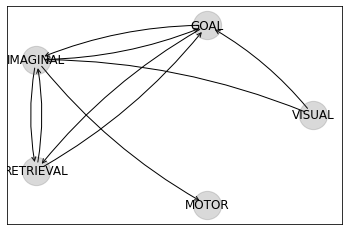

In [180]:
m = maze()
m.draw_maze()

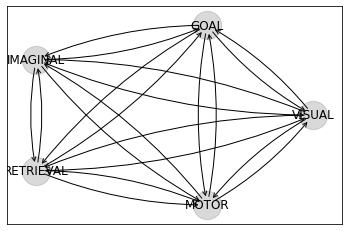

In [181]:
m.draw_full_maze()

In [182]:
a = agent()

In [183]:
a.Q, a.R

(matrix([[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]),
 matrix([[ -1.,   0.,   0.,  -1.,  -1.],
         [  0.,  -1.,   0.,   0.,  -1.],
         [  0.,   0.,  -1.,   0., 100.],
         [ -1.,   0.,   0.,   0.,  -1.],
         [ -1.,  -1.,   0.,  -1., 100.]]))

Trained Q matrix:
[[  0.          63.99999621  80.           0.           0.        ]
 [ 63.99999028   0.          79.99999526  64.           0.        ]
 [ 64.          63.99998103   0.          64.         100.        ]
 [  0.          63.99999621  80.          63.99999621   0.        ]
 [  0.           0.          80.           0.         100.        ]]
Most efficient path:
[0, 2, 4]


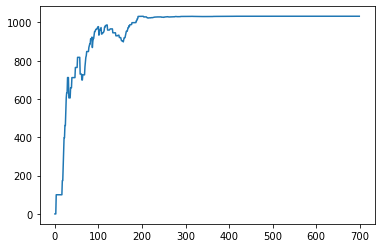

In [184]:
a.q_learning()

In [185]:
a.Q

matrix([[  0.        , 319.99994734, 399.99995788,   0.        ,
           0.        ],
        [319.99991772,   0.        , 399.99993418, 319.9999663 ,
           0.        ],
        [319.9999663 , 319.99987144,   0.        , 319.9999663 ,
         499.99994734],
        [  0.        , 319.99994734, 399.99995788, 319.99994734,
           0.        ],
        [  0.        ,   0.        , 399.99995788,   0.        ,
         499.99994734]])

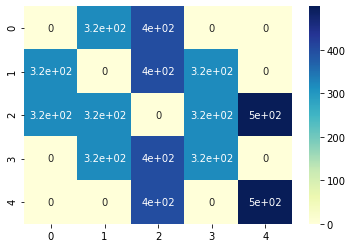

In [186]:
ax = sns.heatmap(a.Q,annot=True, cmap="YlGnBu")

In [81]:
np.matrix(a.Q)

matrix([[  0.        , 319.98257754, 399.97822193,   0.        ,
           0.        ],
        [319.98257754,   0.        , 399.97822193, 319.9335386 ,
           0.        ],
        [319.98257754, 319.9335386 ,   0.        , 319.9335386 ,
         499.97277741],
        [  0.        , 319.98257754, 399.91692325, 319.9335386 ,
           0.        ],
        [  0.        ,   0.        , 399.97822193,   0.        ,
         499.98606203]])

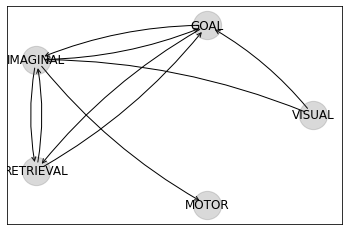

In [84]:
G=nx.DiGraph()
G.add_nodes_from(m.points_list)
G.add_edges_from(m.edges_list)
pos = nx.circular_layout(G) 

nx.draw_networkx_nodes(G,pos, node_color='#444', alpha=.2, node_size=800)
nx.draw_networkx_edges(G,pos, width=1, arrows=True, arrowstyle="->", connectionstyle="arc3,rad=0.1")
nx.draw_networkx_labels(G,pos, m.mappings, horizontalalignment='center', verticalalignment='center')
plt.show()

In [136]:
def matrix2dict(mat):
    dic = {}
    m, n = mat.shape
    for i in range(m):
        for j in range(n):
            dic[ str((i, j)) ] = mat[i,j]
    return dic

In [173]:
widths = matrix2dict(a.Q)
widths = np.array(list(widths.values()))/ 100
widths

array([0.        , 3.19982578, 3.99978222, 0.        , 0.        ,
       3.19982578, 0.        , 3.99978222, 3.19933539, 0.        ,
       3.19982578, 3.19933539, 0.        , 3.19933539, 4.99972777,
       0.        , 3.19982578, 3.99916923, 3.19933539, 0.        ,
       0.        , 0.        , 3.99978222, 0.        , 4.99986062])

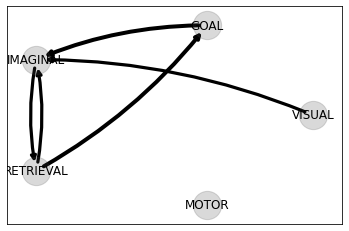

In [176]:
G=nx.DiGraph()
G.add_nodes_from(m.points_list)
G.add_edges_from(m.edges_list)
pos = nx.circular_layout(G) 

nx.draw_networkx_nodes(G,pos, node_color='#444', alpha=.2, node_size=800)
nx.draw_networkx_edges(G,pos, width=widths, arrows=True, arrowstyle="->", connectionstyle="arc3,rad=0.1")
nx.draw_networkx_labels(G,pos, m.mappings, horizontalalignment='center', verticalalignment='center')
plt.show()

In [177]:
for u,v,d in G.edges(data=True):
    print(u,v,d)

0 1 {}
0 2 {}
1 2 {}
1 3 {}
2 1 {}
2 3 {}
2 4 {}
3 1 {}
3 2 {}
3 3 {}
